In [1]:
!pip install langgraph
!pip install langsmith

In [2]:
!pip install langchain
!pip install langchain_groq
!pip install langchain_community

In [3]:
from google.colab import userdata
groq = userdata.get('GROQ_API_KEY')
langsmith = userdata.get('LANGCHAIN_API_KEY')

In [4]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Langgraph_Project"

In [5]:
from langchain_groq import ChatGroq

In [6]:
LLM = ChatGroq(groq_api_key = groq, model_name="Gemma2-9b-It")
LLM

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7d0509216740>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7d0509215480>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [8]:
class State(TypedDict):
  messages : Annotated[list, add_messages]

Graph_builder = StateGraph(State)

Graph_builder

In [9]:
def Chatbot(state:State):
  return {"messages" : LLM.invoke(state['messages'])}

In [10]:
Graph_builder.add_node("Chatbot", Chatbot)
Graph_builder

In [11]:
Graph_builder.add_edge(START, "Chatbot")
Graph_builder.add_edge("Chatbot", END)

In [12]:
graph = Graph_builder.compile()

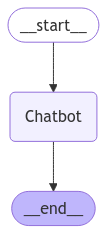

In [13]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [14]:
#del input
user_message = input
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Thank you and have a nice day")
    break
  for query in graph.stream({'messages':("user",user_input)}):
    print(query.values())
    for response in query.values():
      print(response['messages'])
      print("Assistant:",response["messages"].content)

User: hey
dict_values([{'messages': AIMessage(content='Hey there! 👋 \n\nWhat can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 3.8e-07, 'queue_time': 0.014421906, 'total_time': 0.030909471}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-79d07ce2-50aa-4668-99d7-b63b1698bd62-0', usage_metadata={'input_tokens': 10, 'output_tokens': 17, 'total_tokens': 27})}])
content='Hey there! 👋 \n\nWhat can I do for you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 3.8e-07, 'queue_time': 0.014421906, 'total_time': 0.030909471}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-79d07ce